In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install glob2
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=237791 sha256=a043f7267ccab34b0b56d6171d3a649a8f362c3145edd474d47fdaa2f752bdee
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64214 sha256=1d328f5e1ab4267300efdfccde6911da5257a

In [6]:
import pandas as pd
from tqdm.notebook import tqdm
from glob import glob
import os

In [4]:
data_path = '/content/drive/MyDrive/Iqram Sir/sample_in'
file_save_destination = "/content/drive/MyDrive/Iqram Sir/sample_out/Sample_1.csv"

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


  0%|          | 0/255 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


  0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


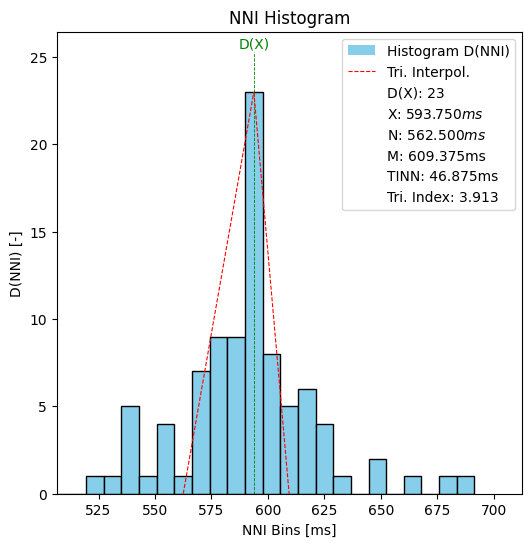

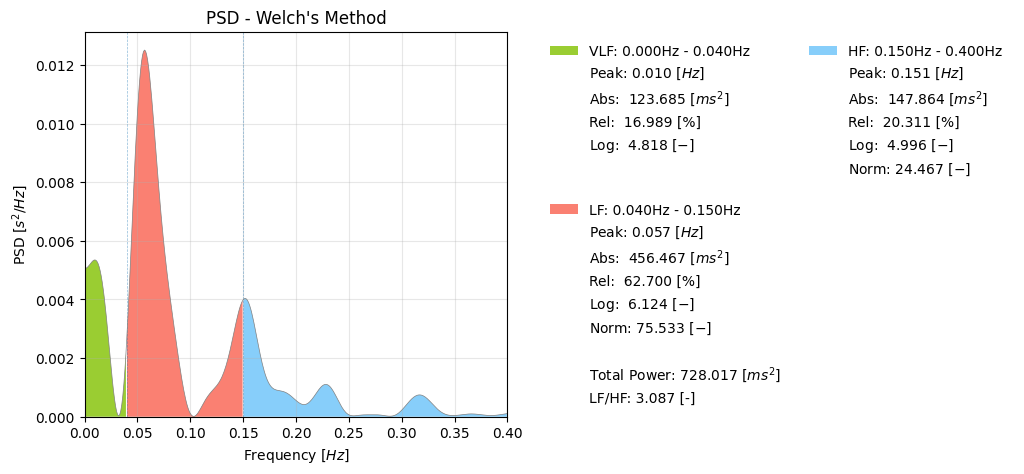

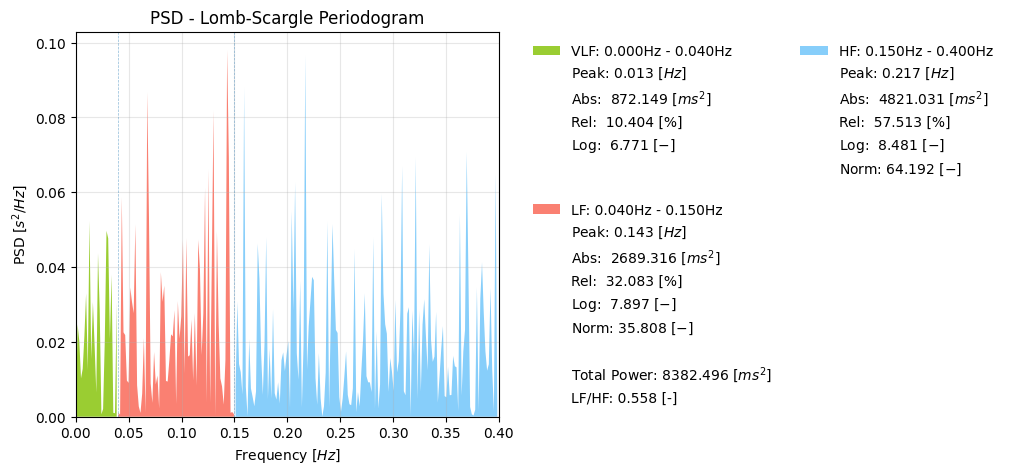

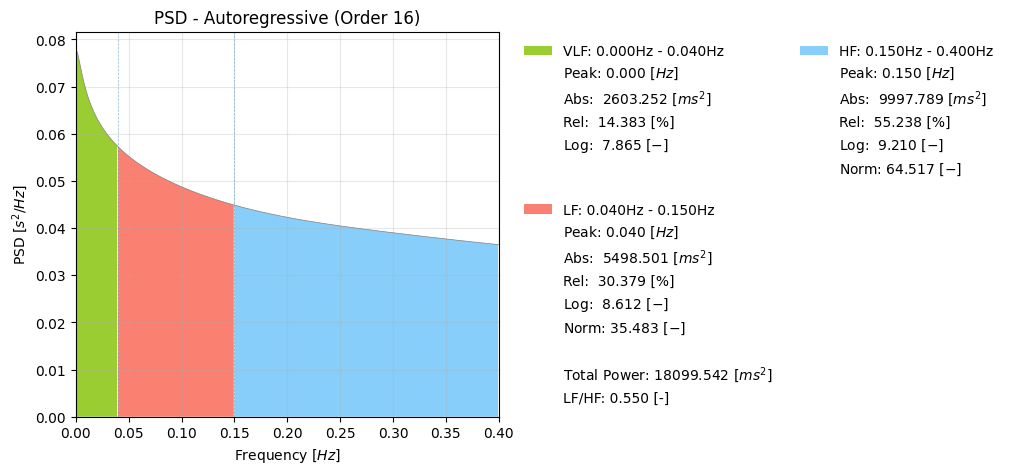

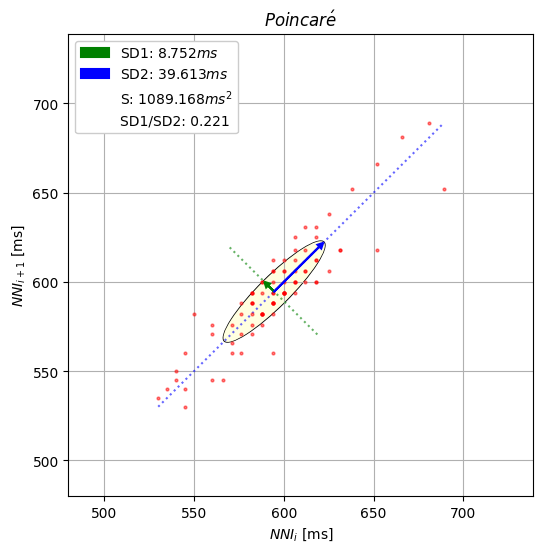

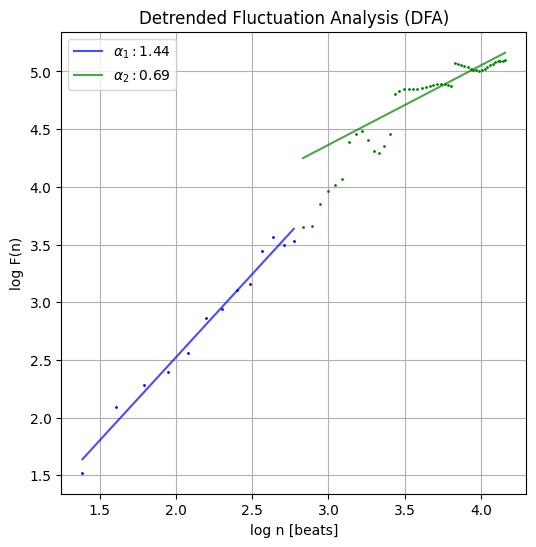

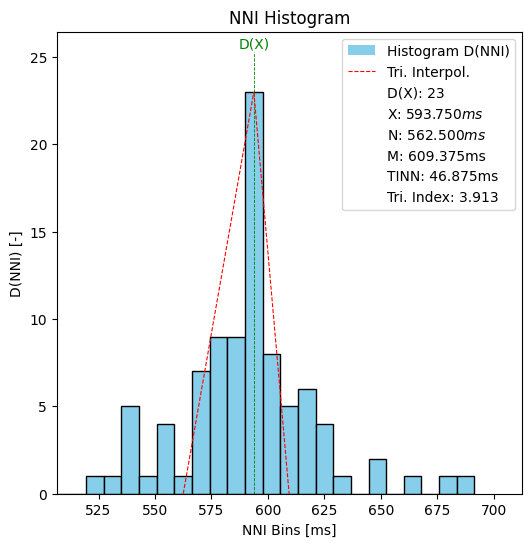

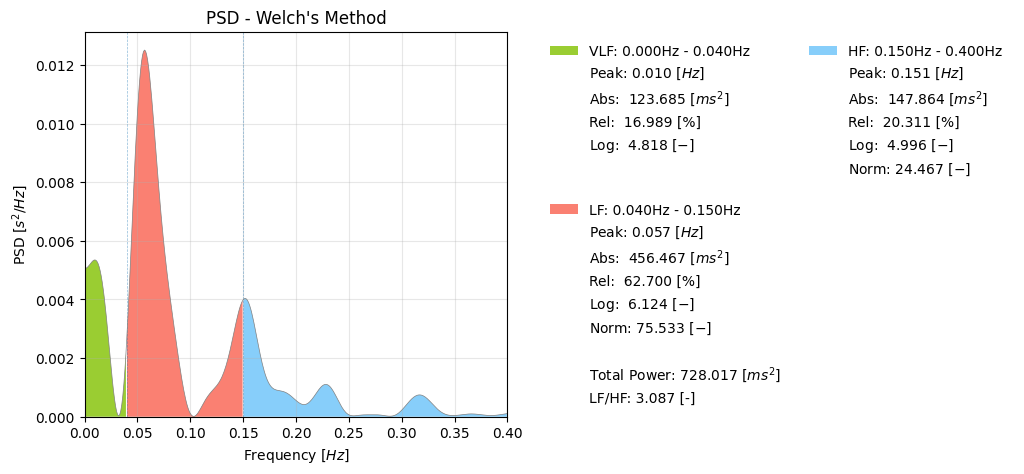

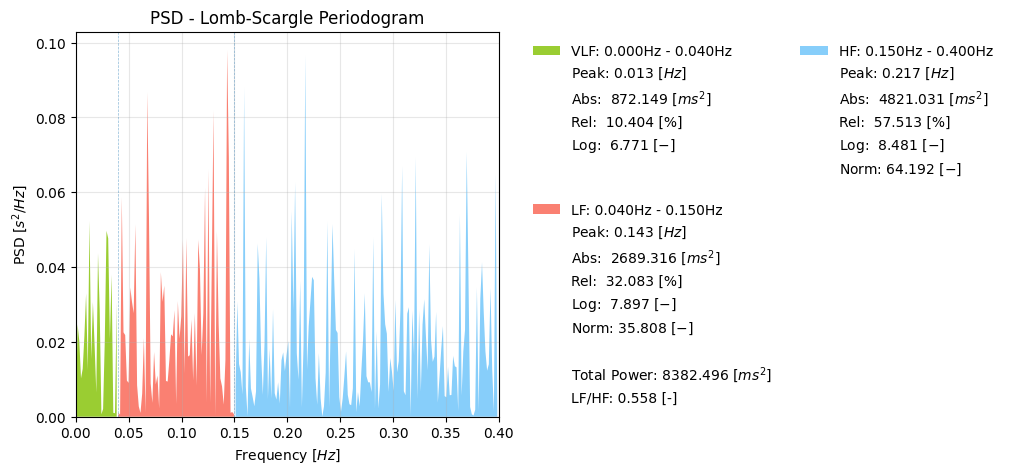

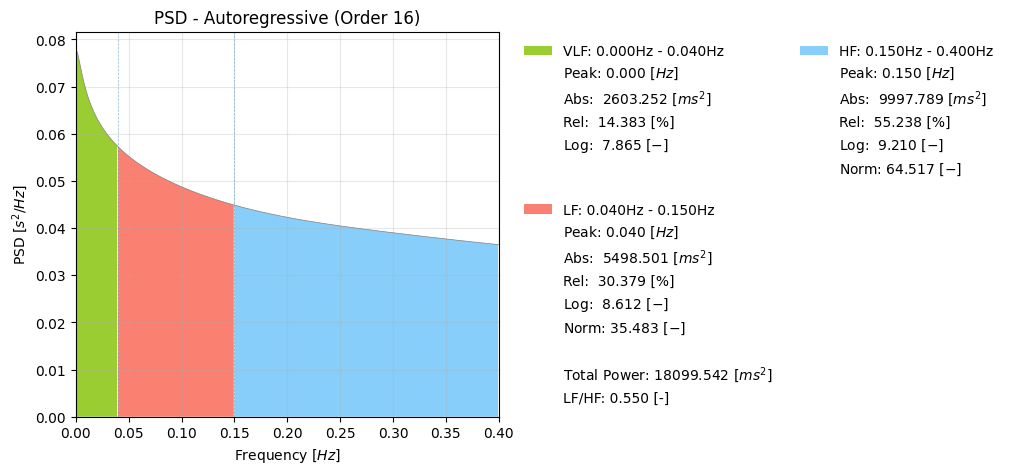

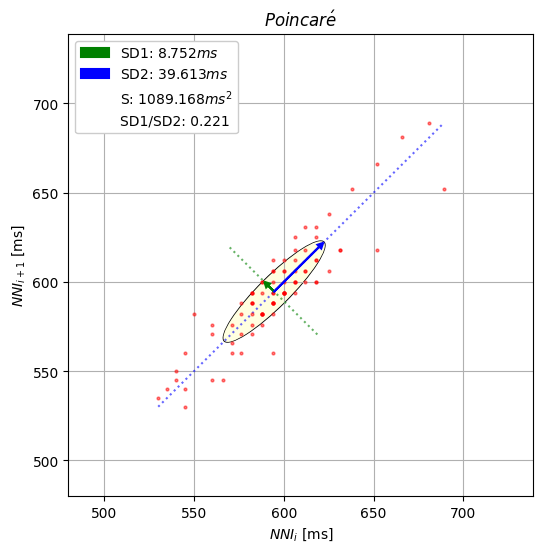

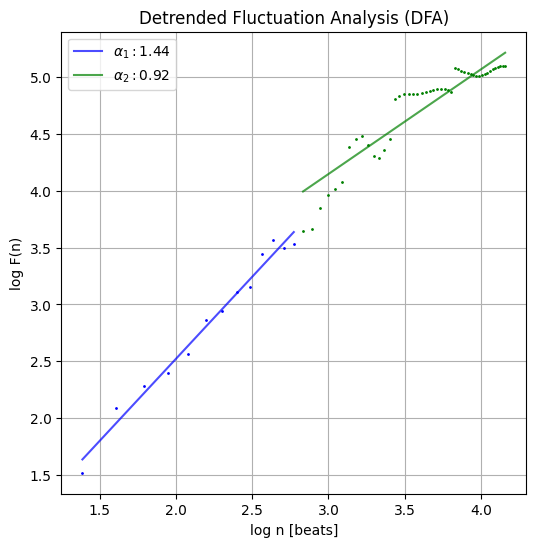

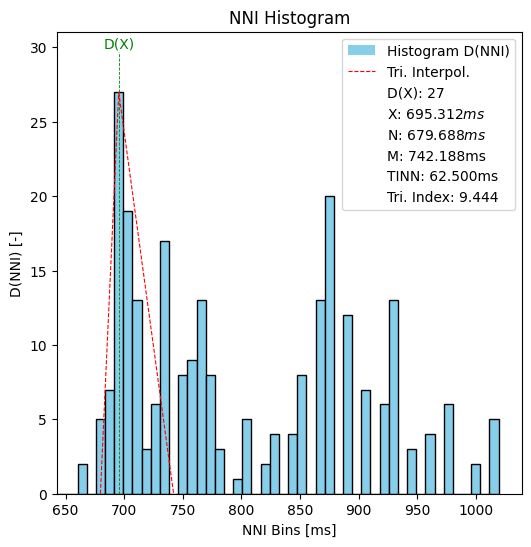

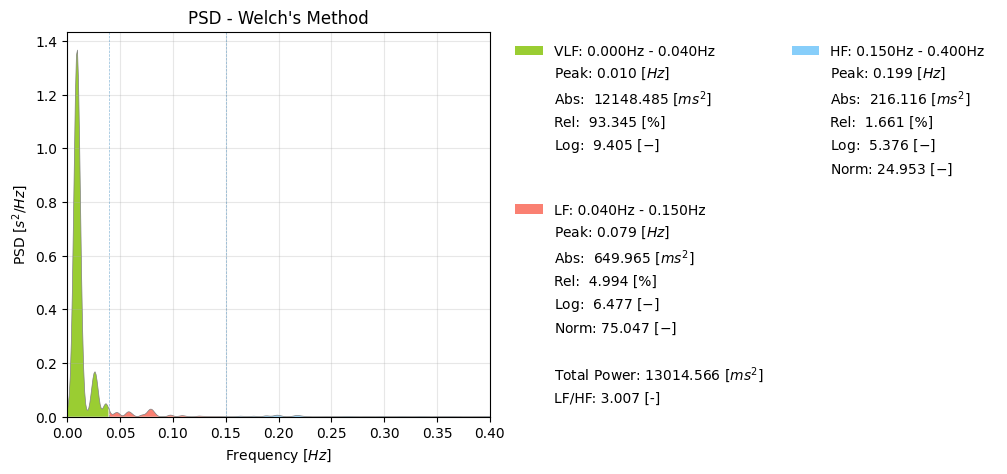

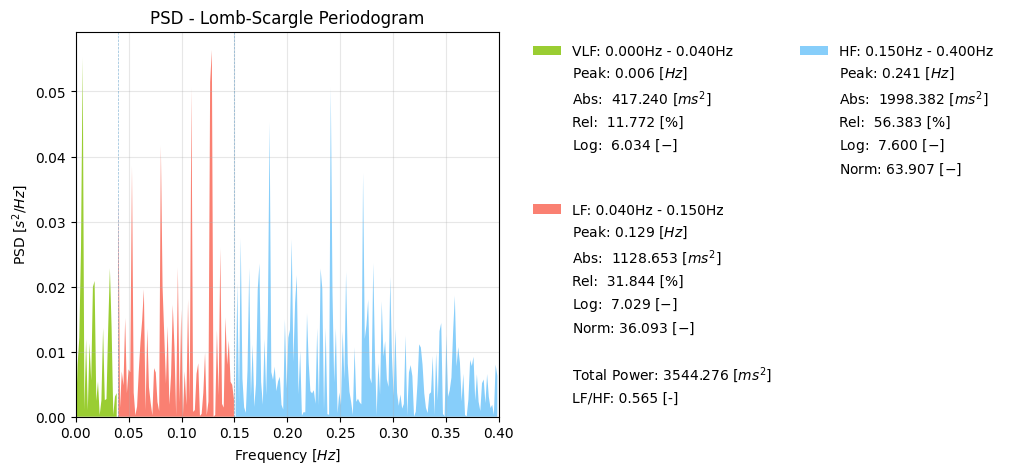

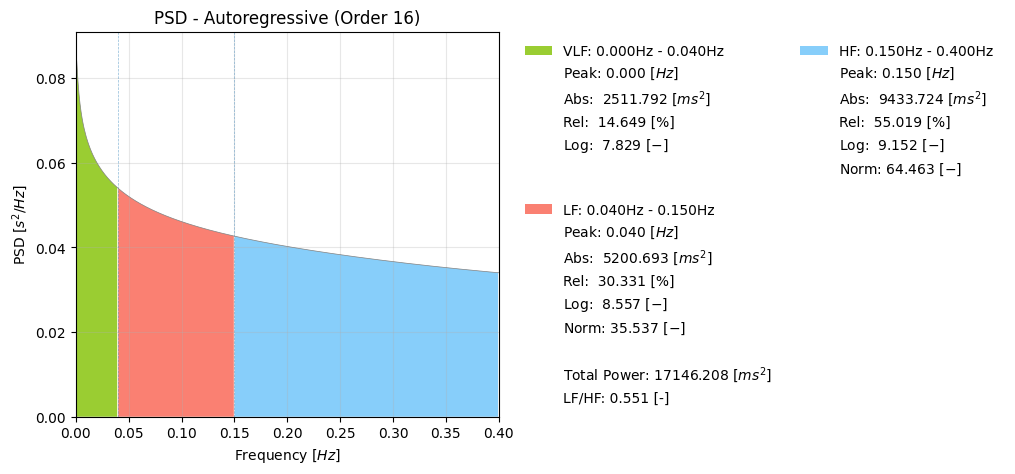

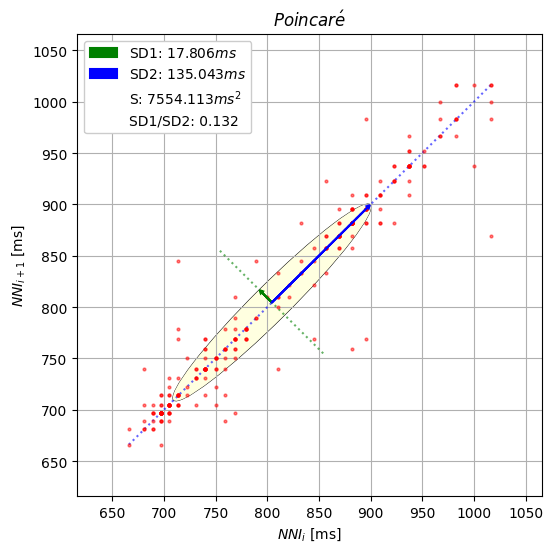

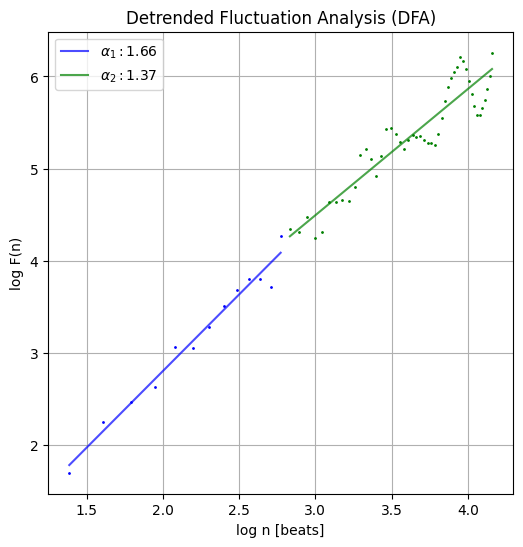

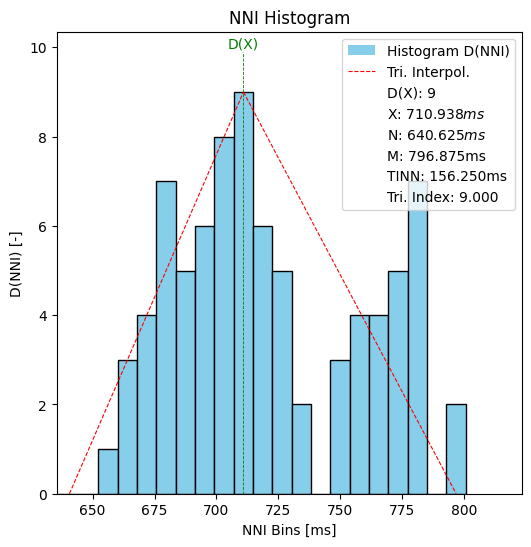

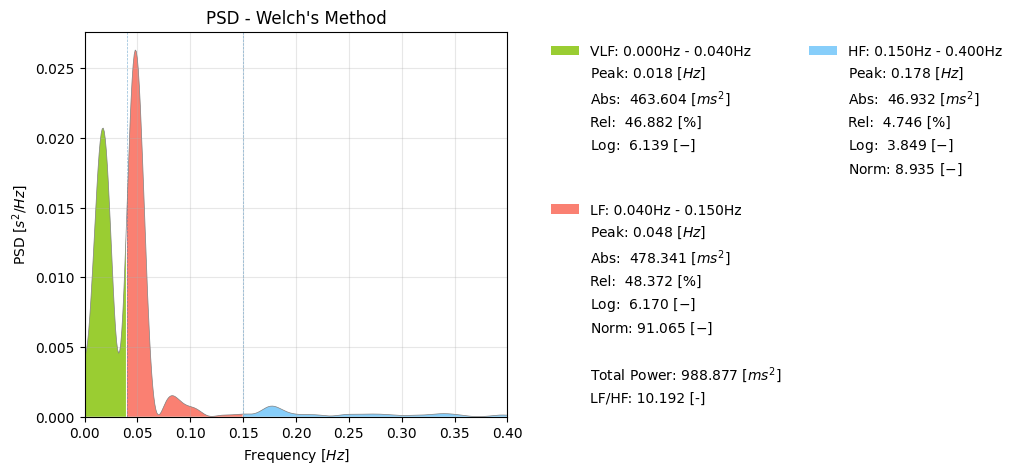

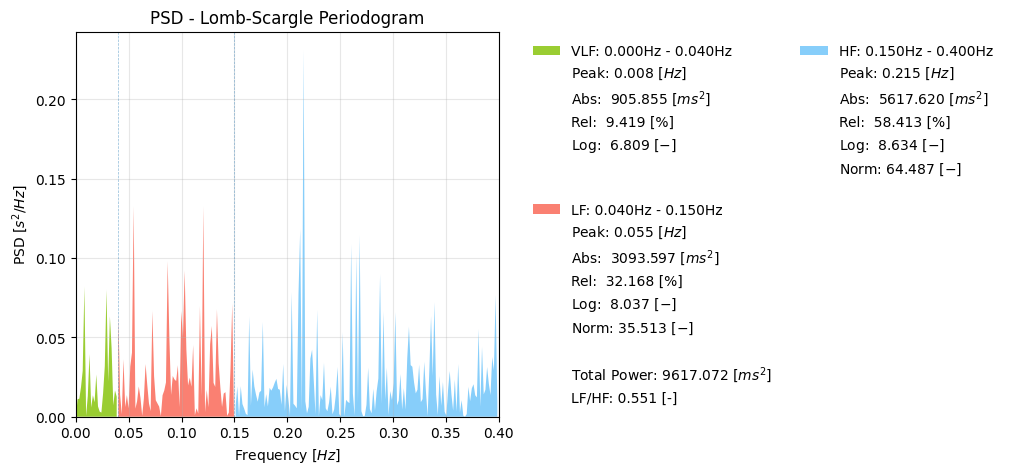

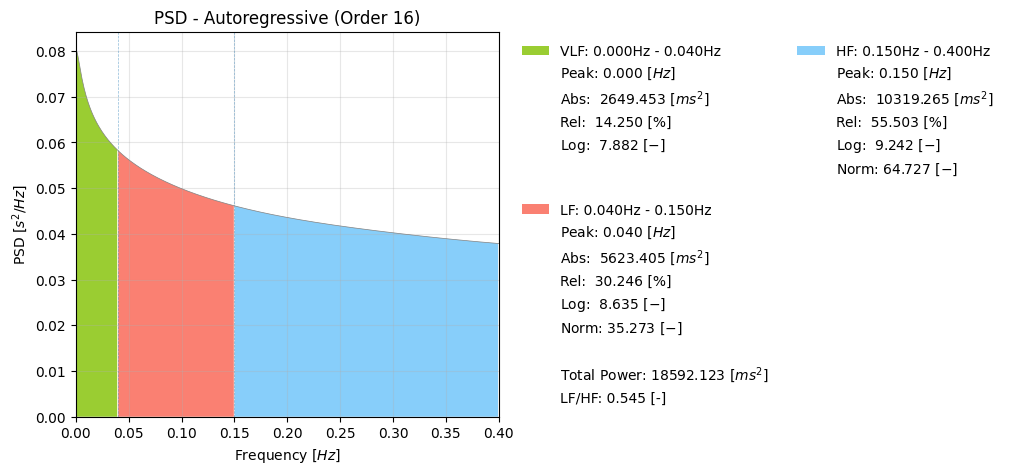

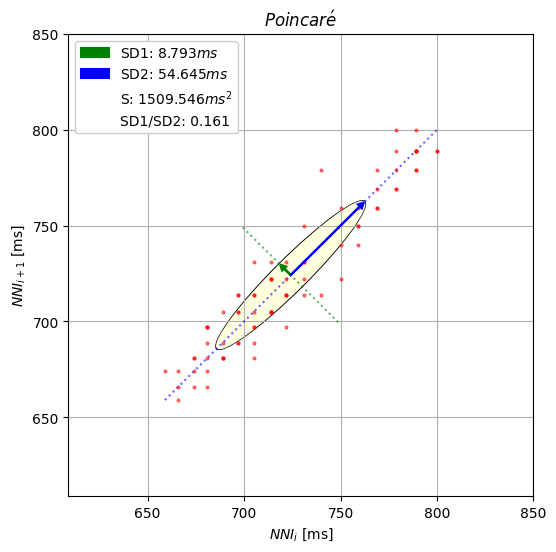

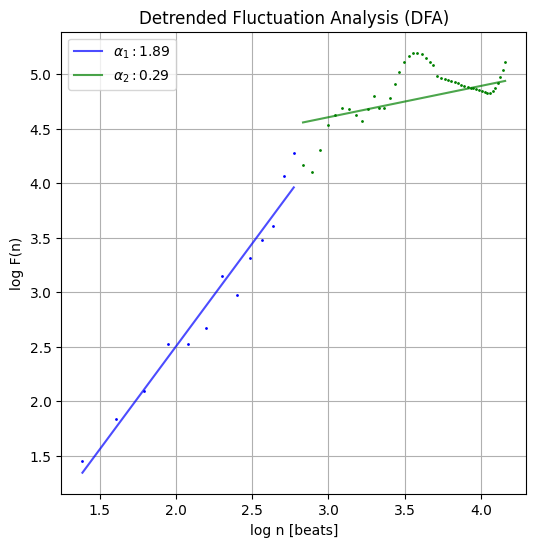

In [9]:
for i in sorted(glob(data_path+"/*")):
  info = os.path.basename(i).split("_")
  if len(info) == 8:
    df = pd.read_csv(i)

    time = []
    hr = []
    rr = []

    for j in tqdm(range(df.shape[0])):
      time.append(df["ActivityMinute"][j])
      hr.append(df["HR(BPM)"][j])
      rr.append(60/df["HR(BPM)"][j])

    d = {
        "Time" : time,
        "HR"  : hr,
        "RR"  : rr
    }

    df2 = pd.DataFrame(d)

    nni = df2["RR"]

    #Time Domain
    import biosppy
    import pyhrv.time_domain as td
    import pyhrv.tools as tools


    nni_results_td = td.time_domain(nni=nni)



    #Frequency Domain
    import biosppy
    import pyhrv.frequency_domain as fd
    import pyhrv.tools as tools

    nni_results_fd = fd.frequency_domain(nni=nni)



    # Non Linear
    import biosppy
    import pyhrv.nonlinear as nl
    import pyhrv.tools as tools

    nni_results_nl = nl.nonlinear(nni=nni)



    dic_sub={
        "Subject" : [info[0]],
        "Condition" : [info[4]],
        "Activity" : [info[2]],
        "Epoch":[info[-1].split(".")[0]]
    }




    dic_td = {'nni_counter': [nni_results_td["nni_counter"]],
    'nni_mean': [nni_results_td["nni_mean"]],
    'nni_min': [nni_results_td["nni_min"]],
    'nni_max': [nni_results_td["nni_max"]],
    'hr_mean': [nni_results_td["hr_mean"]],
    'hr_min': [nni_results_td["hr_min"]],
    'hr_max': [nni_results_td["hr_max"]],
    'hr_std': [nni_results_td["hr_std"]],
    'nni_diff_mean': [nni_results_td["nni_diff_mean"]],
    'nni_diff_min': [nni_results_td["nni_diff_min"]],
    'nni_diff_max': [nni_results_td["nni_diff_max"]],
    'sdnn': [nni_results_td["sdnn"]],
    'sdnn_index': [nni_results_td["sdnn_index"]],
    'sdann': [nni_results_td["sdann"]],
    'rmssd': [nni_results_td["rmssd"]],
    'sdsd': [nni_results_td["sdsd"]],
    'nn50': [nni_results_td["nn50"]],
    'pnn50': [nni_results_td["pnn50"]],
    'nn20': [nni_results_td["nn20"]],
    'pnn20': [nni_results_td["pnn20"]],
    'tinn_n': [nni_results_td["tinn_n"]],
    'tinn_m': [nni_results_td["tinn_m"]],
    'tinn': [nni_results_td["tinn"]],
    'tri_index': [nni_results_td["tri_index"]]}




    dic_fd = {
    'fft_bands_vlf_min': [nni_results_fd["fft_bands"]['vlf'][0]],
    "fft_bands_vlf_max":[nni_results_fd["fft_bands"]['vlf'][1]],
    'fft_bands_lf_min': [nni_results_fd["fft_bands"]['lf'][0]],
    'fft_bands_lf_max': [nni_results_fd["fft_bands"]['lf'][1]],
    'fft_bands_hf_min': [nni_results_fd["fft_bands"]['hf'][0]],
    'fft_bands_hf_max': [nni_results_fd["fft_bands"]['hf'][1]],

    'fft_peak_low': [nni_results_fd["fft_peak"][0]],
    'fft_peak_medium': [nni_results_fd["fft_peak"][1]],
    'fft_peak_high': [nni_results_fd["fft_peak"][2]],

    'fft_abs_low': [nni_results_fd["fft_abs"][0]],
    'fft_abs_medium': [nni_results_fd["fft_abs"][1]],
    'fft_abs_high': [nni_results_fd["fft_abs"][2]],

    'fft_rel_low': [nni_results_fd["fft_rel"][0]],
    'fft_rel_medium': [nni_results_fd["fft_rel"][1]],
    'fft_rel_low': [nni_results_fd["fft_rel"][2]],

    'fft_log_low': [nni_results_fd["fft_log"][0]],
    'fft_log_medium': [nni_results_fd["fft_log"][1]],
    'fft_log_high': [nni_results_fd["fft_log"][2]],

    'fft_norm_low': [nni_results_fd["fft_norm"][0]],
    'fft_norm_high': [nni_results_fd["fft_norm"][1]],

    'fft_ratio': [nni_results_fd["fft_ratio"]],
    'fft_total': [nni_results_fd["fft_total"]],
    'fft_nfft': [nni_results_fd["fft_nfft"]],
    'fft_window': [nni_results_fd["fft_window"]],
    'fft_resampling_frequency': [nni_results_fd["fft_resampling_frequency"]],
    'fft_interpolation': [nni_results_fd["fft_interpolation"]],

    'lomb_bands_vlf_min': [nni_results_fd["lomb_bands"]['vlf'][0]],
    'lomb_bands_vlf_max':[nni_results_fd["lomb_bands"]['vlf'][1]],
    'lomb_bands_lf_min': [nni_results_fd["lomb_bands"]['lf'][0]],
    'lomb_bands_lf_max': [nni_results_fd["lomb_bands"]['lf'][1]],
    'lomb_bands_hf_min': [nni_results_fd["lomb_bands"]['hf'][0]],
    'lomb_bands_hf_max': [nni_results_fd["lomb_bands"]['hf'][1]],

    'lomb_peak_low': [nni_results_fd["lomb_peak"][0]],
    'lomb_peak_medium': [nni_results_fd["lomb_peak"][1]],
    'lomb_peak_high': [nni_results_fd["lomb_peak"][2]],

    'lomb_abs_low': [nni_results_fd["lomb_abs"][0]],
    'lomb_abs_medium': [nni_results_fd["lomb_abs"][1]],
    'lomb_abs_high': [nni_results_fd["lomb_abs"][2]],
    
    'lomb_rel_low': [nni_results_fd["lomb_rel"][0]],
    'lomb_rel_medium': [nni_results_fd["lomb_rel"][1]],
    'lomb_rel_high': [nni_results_fd["lomb_rel"][2]],

    'lomb_log_low': [nni_results_fd["lomb_log"][0]],
    'lomb_log_medium': [nni_results_fd["lomb_log"][1]],
    'lomb_log_high': [nni_results_fd["lomb_log"][2]],


    'lomb_norm_high': [nni_results_fd["lomb_norm"][0]],
    'lomb_norm_Low': [nni_results_fd["lomb_norm"][1]],


    'lomb_ratio': [nni_results_fd["lomb_ratio"]],
    'lomb_total': [nni_results_fd["lomb_total"]],
    'lomb_nfft': [nni_results_fd["lomb_nfft"]],
    'lomb_ma': [nni_results_fd["lomb_ma"]],


    'ar_bands_vlf_min': [nni_results_fd["ar_bands"]['vlf'][0]],
    'ar_bands_vlf_max':[nni_results_fd["ar_bands"]['vlf'][1]],
    'ar_bands_lf_min': [nni_results_fd["ar_bands"]['lf'][0]],
    'ar_bands_lf_max': [nni_results_fd["ar_bands"]['lf'][1]],
    'ar_bands_hf_min': [nni_results_fd["ar_bands"]['hf'][0]],
    'ar_bands_hf_max': [nni_results_fd["ar_bands"]['hf'][1]],

    'ar_peak_low': [nni_results_fd["ar_peak"][0]],
    'ar_peak_medium': [nni_results_fd["ar_peak"][1]],
    'ar_peak_high': [nni_results_fd["ar_peak"][2]],


    'ar_abs_low': [nni_results_fd["ar_abs"][0]],
    'ar_abs_medium': [nni_results_fd["ar_abs"][1]],
    'ar_abs_high': [nni_results_fd["ar_abs"][2]],

    'ar_rel_low': [nni_results_fd["ar_rel"][0]],
    'ar_rel_medium': [nni_results_fd["ar_rel"][1]],
    'ar_rel_high': [nni_results_fd["ar_rel"][2]],


    'ar_log_low': [nni_results_fd["ar_log"][0]],
    'ar_log_medium': [nni_results_fd["ar_log"][1]],
    'ar_log_high': [nni_results_fd["ar_log"][2]],


    'ar_norm_low': [nni_results_fd["ar_norm"][0]],
    'ar_norm_high': [nni_results_fd["ar_norm"][1]],

    'ar_ratio': [nni_results_fd["ar_ratio"]],
    'ar_total': [nni_results_fd["ar_total"]],
    'ar_nfft': [nni_results_fd["ar_nfft"]],
    'ar_order': [nni_results_fd["ar_order"]],
    'ar_resampling_frequency': [nni_results_fd["ar_resampling_frequency"]],
    'ar_interpolation': [nni_results_fd["ar_interpolation"]]}



    dic_nl = {'sd1': [nni_results_nl["sd1"]],
    'sd2': [nni_results_nl["sd2"]],
    'sd_ratio': [nni_results_nl["sd_ratio"]],
    'ellipse_area': [nni_results_nl["ellipse_area"]],
    'sampen': [nni_results_nl["sampen"]],
    'dfa_alpha1': [nni_results_nl["dfa_alpha1"]],
    'dfa_alpha2': [nni_results_nl["dfa_alpha2"]],
    }


    final_dic = dic_sub|dic_td|dic_fd|dic_nl

    if os.path.exists(file_save_destination)==False:
      df = pd.DataFrame.from_dict(final_dic)
      df.to_csv(file_save_destination,index=False)

    else:
      temp_df = pd.DataFrame(final_dic)
      temp_df.to_csv(file_save_destination, mode='a', index=False, header=False)